In [1]:
from mnist_load import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
digit = 7
data, indices = load_mnist_data(digit, digit, 0.5, 0.06596306068*500/240)

In [4]:
N = 16
images = data.training[0][:500, :]

In [5]:
mu_image = images.mean(axis=0)
cov_image = np.cov(images.T)

In [6]:
L, U = np.linalg.eig(cov_image)
basis = np.real(U[:, :N])
variances = np.real(L[:N])

In [7]:
Y_mu = np.zeros((N))
Y_Sigma =np.diag(variances)

In [17]:
def sample_X(n, mu, U, ymu, ysigma):
    return np.array([mu + U @ np.random.multivariate_normal(ymu, ysigma) for i in range(0, n)])

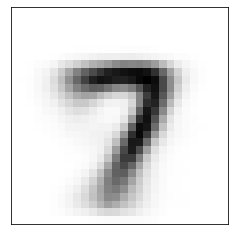

In [9]:
fig, ax = plt.subplots(figsize=(4,4))
width = int(np.sqrt(mu_image.shape[0]))
ax.imshow(mu_image.reshape(width, width), extent=[0, 1, 0, 1], cmap="Greys")
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
plt.savefig("../img/digit_{}.eps".format(digit))
plt.show()

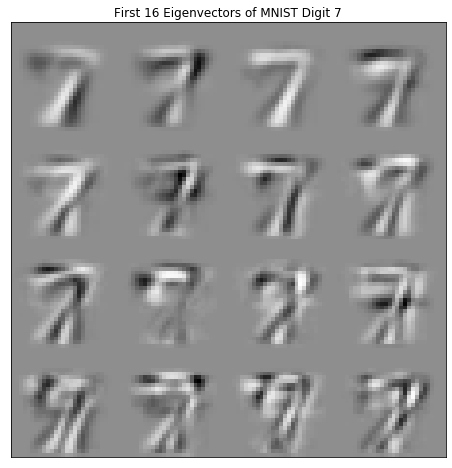

In [10]:
fig, ax = plt.subplots(figsize=(8, 8))
view_digits(ax, basis.T, 4, 4)
ax.set_title("First 16 Eigenvectors of MNIST Digit {}".format(digit))
plt.savefig("../img/evectors_{}.eps".format(digit))
plt.show()

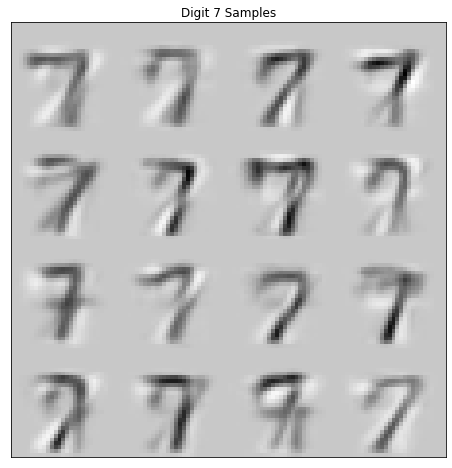

In [16]:
nx, ny = 4, 4
samples = sample_X(nx*ny, mu_image, basis, Y_mu, Y_Sigma)
samples_thresh = samples.copy()
fig, ax = plt.subplots(figsize=(8, 8))
view_digits(ax, samples_thresh, nx, ny)
ax.set_title("Digit {} Samples".format(digit))
plt.savefig("../img/samples_{}.eps".format(digit))
plt.show()